In [3]:
import torch
import numpy as np
from torch_geometric.datasets import ModelNet
from torch_geometric.transforms import SamplePoints

In [4]:
data_train_ = ModelNet(root='../modelnet', name='40', train=True, transform=SamplePoints(512))
data_test_ = ModelNet(root='../modelnet', name='40', train=False, transform=SamplePoints(512))

X_train_ = np.array([data_train_[i].pos.numpy() for i in range(len(data_train_))])
y_train = np.array([data_train_[i].y.numpy() for i in range(len(data_train_))]).squeeze()
X_test_ = np.array([data_test_[i].pos.numpy() for i in range(len(data_test_))])
y_test = np.array([data_test_[i].y.numpy() for i in range(len(data_test_))]).squeeze()
def normalize(data):
    sample_min = np.amin(data,axis=1,keepdims=True)
    sample_max = np.amax(data,axis=(1,2),keepdims=True)
    return (data-sample_min)/sample_max
X_train = normalize(X_train_)
X_test = normalize(X_test_)

In [5]:
import matplotlib.pyplot as plt

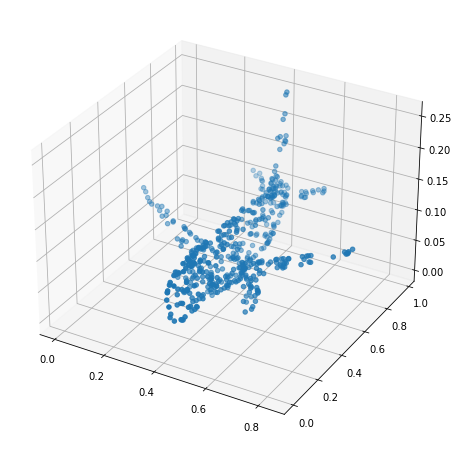

In [6]:
fig0 = plt.figure(figsize=(8,8))
ax0 = fig0.add_subplot(projection='3d')
ax0.scatter(X_train[0][:,0],X_train[0][:,1], X_train[0][:,2])

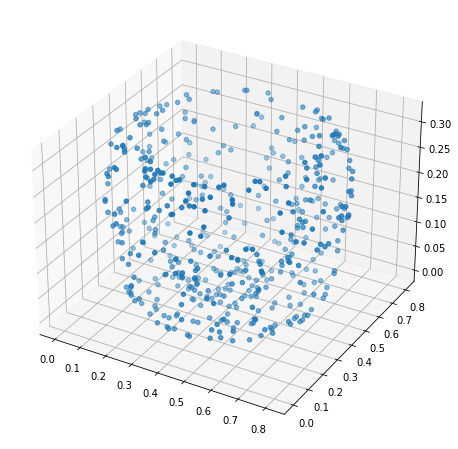

In [7]:
fig1 = plt.figure(figsize=(8,8))
ax1 = fig1.add_subplot(projection='3d')
ax1.scatter(X_train[2378][:,0],X_train[2378][:,1], X_train[2378][:,2])